True Mean Group 1:  49.97864016631574
True Mean Group 2:  60.20301079597331
True Mean Population:  55.09082548114453
Biased Sample Mean:  58.74095840499828


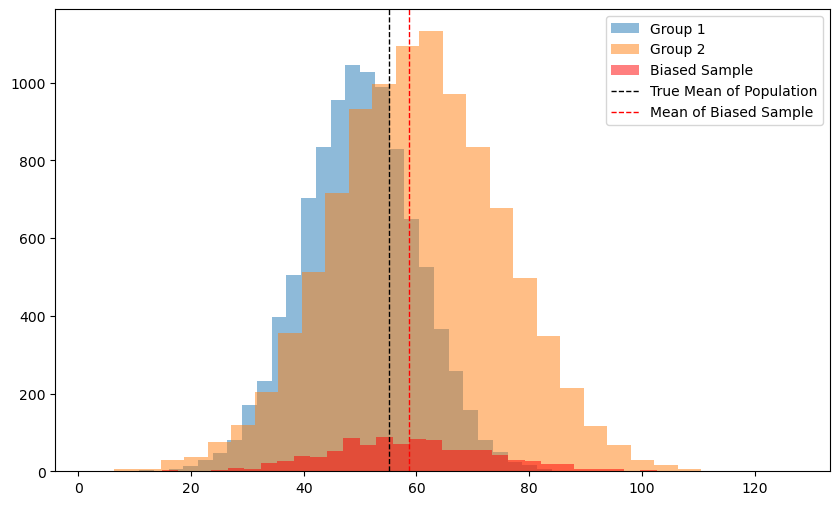

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate a population
group1 = np.random.normal(loc=50, scale=10, size=10000)  # Group 1
group2 = np.random.normal(loc=60, scale=15, size=10000)  # Group 2
population = np.concatenate((group1, group2))

# True means
true_mean_group1 = np.mean(group1)
true_mean_group2 = np.mean(group2)
true_mean_population = np.mean(population)

# Perform biased sampling
biased_sample = np.concatenate((np.random.choice(group1, size=200, replace=False),
                                np.random.choice(group2, size=800, replace=False)))

# Calculate the mean of the biased sample
biased_sample_mean = np.mean(biased_sample)

# Display the results
print("True Mean Group 1: ", true_mean_group1)
print("True Mean Group 2: ", true_mean_group2)
print("True Mean Population: ", true_mean_population)
print("Biased Sample Mean: ", biased_sample_mean)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(group1, bins=30, alpha=0.5, label="Group 1")
plt.hist(group2, bins=30, alpha=0.5, label="Group 2")
plt.hist(biased_sample, bins=30, alpha=0.5, color='red', label="Biased Sample")
plt.axvline(true_mean_population, color='k', linestyle='dashed', linewidth=1, label="True Mean of Population")
plt.axvline(biased_sample_mean, color='red', linestyle='dashed', linewidth=1, label="Mean of Biased Sample")
plt.legend()
plt.show()


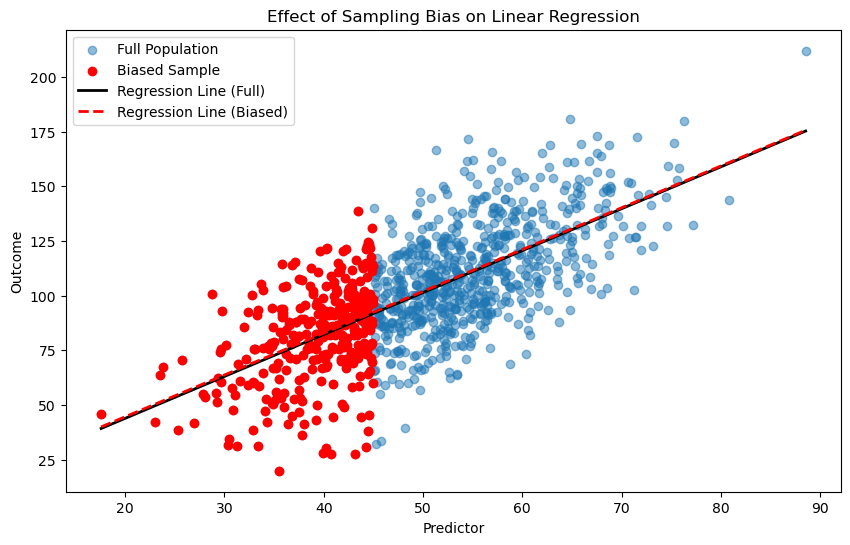

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate a population
x = np.random.normal(50, 10, 1000)  # Predictor
y = 2 * x + np.random.normal(0, 20, 1000)  # Dependent variable with some noise

# Full data linear regression
model_full = LinearRegression().fit(x.reshape(-1, 1), y)
line_full = model_full.predict(np.array([[x.min()], [x.max()]]))

# Introduce sampling bias: Selecting more data from the lower end of x
indices_biased = np.where(x < 45)[0]
x_biased = x[indices_biased]
y_biased = y[indices_biased]

# Biased data linear regression
model_biased = LinearRegression().fit(x_biased.reshape(-1, 1), y_biased)
line_biased = model_biased.predict(np.array([[x.min()], [x.max()]]))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label="Full Population")
plt.scatter(x_biased, y_biased, color='red', label="Biased Sample")
plt.plot([x.min(), x.max()], line_full, 'k-', lw=2, label="Regression Line (Full)")
plt.plot([x.min(), x.max()], line_biased, 'r--', lw=2, label="Regression Line (Biased)")
plt.legend()
plt.xlabel("Predictor")
plt.ylabel("Outcome")
plt.title("Effect of Sampling Bias on Linear Regression")
plt.show()
